In [8]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib numpy scikit-learn seaborn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\gandr\AppData\Local\Temp\pip-install-fevtdzmt\tensorflow-gpu_a36549a55dc44db4b62760352dcb80aa\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not buil

In [9]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [11]:
data_dir = 'model/data'
os.listdir(data_dir)


['.DS_Store', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
data = tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



## Building data pipeline

In [13]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 18000 files belonging to 12 classes.


To access our data pipeline

In [14]:
data_iterator = data.as_numpy_iterator()

Accessing data pipeline

In [15]:
batch =data_iterator.next()
batch

(array([[[[204.5     , 201.5     , 194.5     ],
          [202.3164  , 199.3164  , 192.3164  ],
          [202.20312 , 199.20312 , 192.20312 ],
          ...,
          [110.390625,  57.640625,  35.890625],
          [108.453125,  55.28125 ,  34.671875],
          [100.40234 ,  50.402344,  27.402344]],
 
         [[201.58594 , 198.58594 , 191.58594 ],
          [202.92188 , 199.92188 , 192.92188 ],
          [205.6914  , 202.6914  , 195.6914  ],
          ...,
          [109.25    ,  54.25    ,  33.25    ],
          [105.54297 ,  53.54297 ,  31.542969],
          [ 97.45703 ,  45.45703 ,  21.542969]],
 
         [[200.40234 , 197.40234 , 190.40234 ],
          [196.91016 , 193.91016 , 186.91016 ],
          [203.39453 , 200.39453 , 193.39453 ],
          ...,
          [104.23828 ,  52.23828 ,  30.238281],
          [ 99.73828 ,  49.73828 ,  26.738281],
          [ 92.91797 ,  42.91797 ,  17.917969]],
 
         ...,
 
         [[102.22656 , 103.72656 ,  90.76172 ],
          [144.992

In [16]:
len(batch)

2

Images represented as np arrays, 0 is the image, 1 is the class

In [17]:
batch[0].shape

(32, 256, 256, 3)

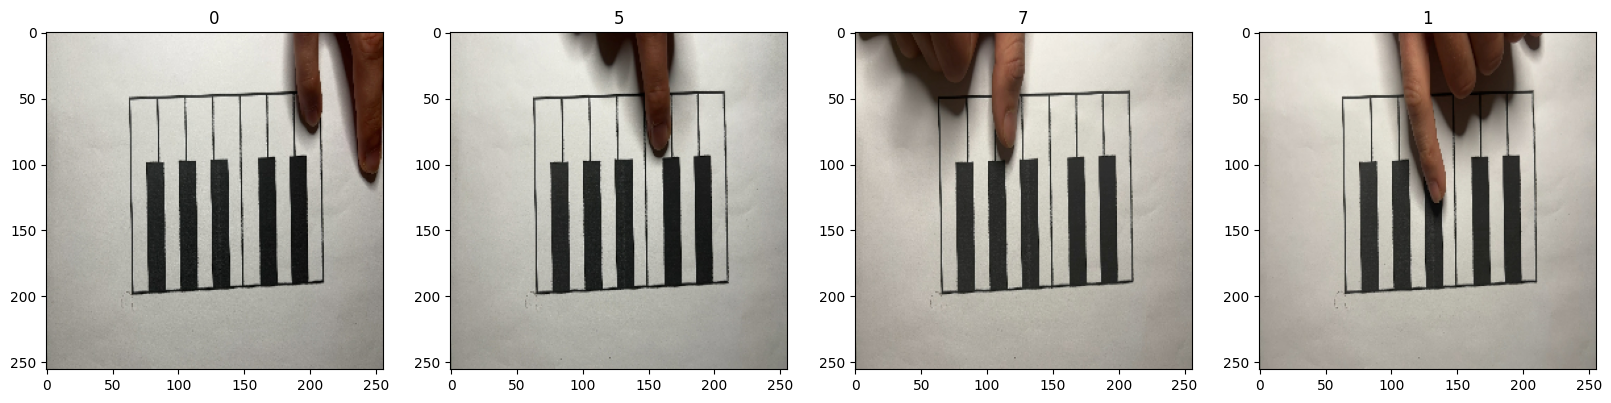

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing
map function allows us to preprocess data while it is passing trough data pipeline

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()


In [22]:
batch[0].max()

0.9943168

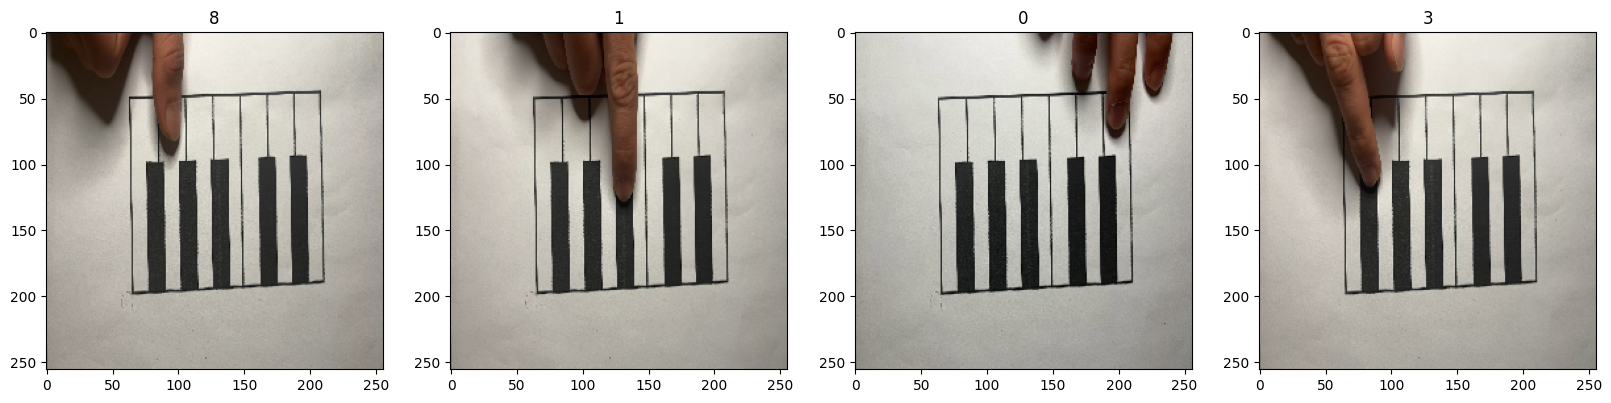

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Model

In [24]:
len(data)

563

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [26]:
train_size + val_size +test_size

563

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## CNN model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(12, activation ='softmax'))

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)       

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:

history = model.fit(train, epochs=1,
                    validation_data=val,
                    callbacks=[tensorboard_callback])

c:\Users\gandr\Documents\VSproj\PDS-Piano\.venv\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 95/394 [======>.......................] - ETA: 4:11 - loss: 2.8173 - accuracy: 0.3276

KeyboardInterrupt: 

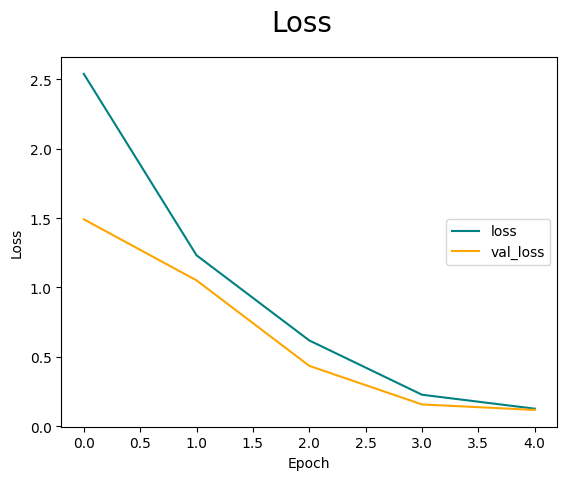

In [64]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color = 'orange', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='right')
plt.show()



57/57 - 56s - loss: 0.1144 - accuracy: 1.0000 - 56s/epoch - 985ms/step
1.0


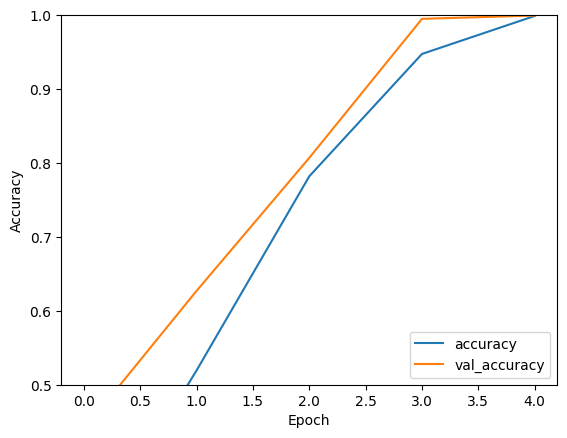

In [65]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test, verbose=2)

print(test_acc)

### Evaluation Metrics

In [66]:
from sklearn.metrics import accuracy_score, precision_score

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through each batch in the test dataset
for batch in test.as_numpy_iterator():
    X, y = batch
    # Predict the output labels for the input images
    yhat = model.predict(X)
    # Convert predicted probabilities to class labels
    predicted_labels.extend(yhat.argmax(axis=1))
    # Extend true_labels directly with class indices
    true_labels.extend(y)


1/1 [==============================] - 0s 100ms/step


In [69]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl (11.6 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


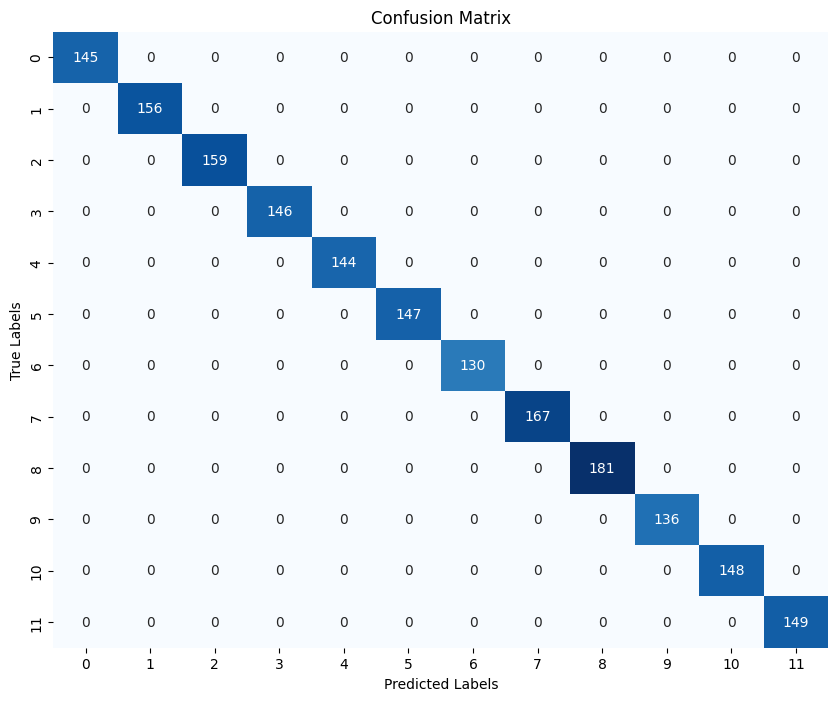

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [71]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='macro')  # You can use other averaging methods as well
print("Precision:", precision)

Accuracy: 1.0
Precision: 1.0


Number of predictions:  1808


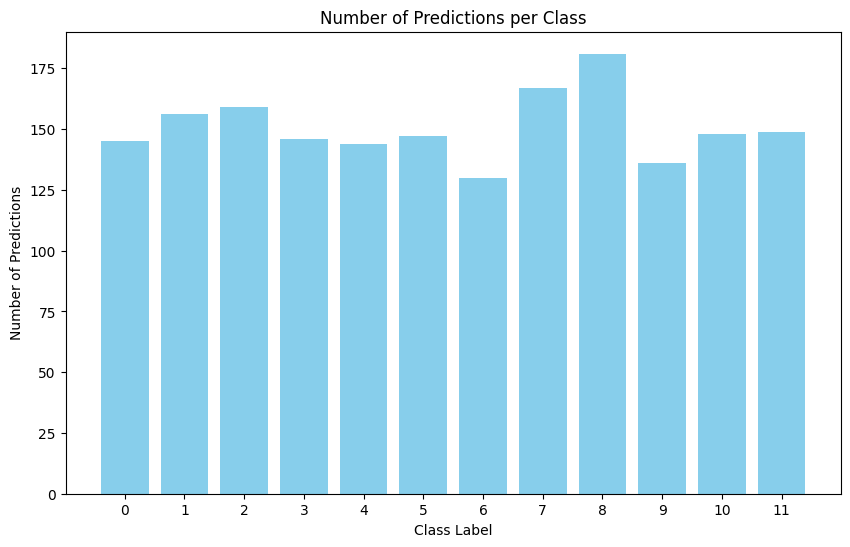

In [72]:
import matplotlib.pyplot as plt

# Count the occurrences of each predicted label
predicted_counts = {}
for label in predicted_labels:
    if label in predicted_counts:
        predicted_counts[label] += 1
    else:
        predicted_counts[label] = 1

# Sort the predicted counts by class label
sorted_predicted_counts = sorted(predicted_counts.items())

# Extract labels and counts
labels, counts = zip(*sorted_predicted_counts)

print('Number of predictions: ', len(predicted_labels))

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions per Class')
plt.xticks(labels)
plt.show()


In [73]:
from sklearn.metrics import classification_report

# Calculate classification report
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       156
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       146
           4       1.00      1.00      1.00       144
           5       1.00      1.00      1.00       147
           6       1.00      1.00      1.00       130
           7       1.00      1.00      1.00       167
           8       1.00      1.00      1.00       181
           9       1.00      1.00      1.00       136
          10       1.00      1.00      1.00       148
          11       1.00      1.00      1.00       149

    accuracy                           1.00      1808
   macro avg       1.00      1.00      1.00      1808
weighted avg       1.00      1.00      1.00      1808



### Exporting the model

In [99]:
from tensorflow.keras.models import load_model

In [100]:
model.save(os.path.join('model','pianoHand.h5'))

c:\Users\gandr\Documents\VSproj\PDS-Piano\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### How to load it

In [101]:
os.path.join('model','pianoHand.h5')

'model\\pianoHand.h5'

In [102]:
new_model = load_model(os.path.join('model','pianoHand.h5'))
# predict = new_predict(X)

In [103]:
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 258064)            0         
                                                                 
 dense_20 (Dense)            (None, 45)                11612925  
                                                                 
 dense_21 (Dense)            (None, 12)                552       
                                                                 
Total params: 11613925 (44.30 MB)
Trainable params: 11613925 (44.30 MB)
Non-trainable params: 0 (0.00 Byte)
___________

In [104]:
import os
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np


In [116]:
# Define the target input dimensions expected by your model
input_width, input_height = 256, 256  

# Load the image using PIL (Pillow)
image_path = os.path.join('model', 'data', '7', '10.jpg')
image = Image.open(image_path)

# Resize the image to match the input dimensions of the model
image = image.resize((input_width, input_height))

# Convert the image to a numpy array and normalize pixel values
image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]

# Expand the dimensions of the image array to match the input shape expected by the model
input_data = np.expand_dims(image_array, axis=0)


In [117]:
# Perform inference using the loaded model
predictions = new_model.predict(input_data)

# Assuming a classification task with softmax output, get the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Display the predicted class index
print("Predicted Class Index:", predicted_class_index)


1/1 [==============================] - 0s 24ms/step
Predicted Class Index: 9
